In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [407]:
columns_list = ['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',  'Complaint Type', 'Descriptor', 'Borough']
df = pd.read_csv('311-2015.csv', nrows=200000, usecols= columns_list).head(200000)

In [408]:
df.head(3)

Unique Key            Created Date             Closed Date Agency  \
0    31015465  07/06/2015 10:58:27 AM  07/22/2015 01:07:20 AM    DCA   
1    30997660  07/03/2015 01:26:29 PM  07/03/2015 02:08:20 PM   NYPD   
2    31950223  11/09/2015 03:55:09 AM  11/09/2015 08:08:57 AM   NYPD   

                       Agency Name      Complaint Type          Descriptor  \
0   Department of Consumer Affairs  Consumer Complaint     Demand for Cash   
1  New York City Police Department             Vending  In Prohibited Area   
2  New York City Police Department    Blocked Driveway           No Access   

     Borough  
0     QUEENS  
1  MANHATTAN  
2      BRONX

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
Unique Key        200000 non-null int64
Created Date      200000 non-null object
Closed Date       188913 non-null object
Agency            200000 non-null object
Agency Name       200000 non-null object
Complaint Type    200000 non-null object
Descriptor        198197 non-null object
Borough           200000 non-null object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [410]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df['created_datetime'] = df['Created Date'].apply(parse_date)
df.head(3)

Unique Key            Created Date             Closed Date Agency  \
0    31015465  07/06/2015 10:58:27 AM  07/22/2015 01:07:20 AM    DCA   
1    30997660  07/03/2015 01:26:29 PM  07/03/2015 02:08:20 PM   NYPD   
2    31950223  11/09/2015 03:55:09 AM  11/09/2015 08:08:57 AM   NYPD   

                       Agency Name      Complaint Type          Descriptor  \
0   Department of Consumer Affairs  Consumer Complaint     Demand for Cash   
1  New York City Police Department             Vending  In Prohibited Area   
2  New York City Police Department    Blocked Driveway           No Access   

     Borough    created_datetime  
0     QUEENS 2015-07-06 10:58:27  
1  MANHATTAN 2015-07-03 13:26:29  
2      BRONX 2015-11-09 03:55:09

In [411]:
df.index = df['created_datetime']

In [412]:
df = df.drop(['Created Date', 'created_datetime'], axis=1)
df.head(3)

Unique Key             Closed Date Agency  \
created_datetime                                                 
2015-07-06 10:58:27    31015465  07/22/2015 01:07:20 AM    DCA   
2015-07-03 13:26:29    30997660  07/03/2015 02:08:20 PM   NYPD   
2015-11-09 03:55:09    31950223  11/09/2015 08:08:57 AM   NYPD   

                                         Agency Name      Complaint Type  \
created_datetime                                                           
2015-07-06 10:58:27   Department of Consumer Affairs  Consumer Complaint   
2015-07-03 13:26:29  New York City Police Department             Vending   
2015-11-09 03:55:09  New York City Police Department    Blocked Driveway   

                             Descriptor    Borough  
created_datetime                                    
2015-07-06 10:58:27     Demand for Cash     QUEENS  
2015-07-03 13:26:29  In Prohibited Area  MANHATTAN  
2015-11-09 03:55:09           No Access      BRONX

What was the **most popular type of complaint**, and how many times was it filed?

In [413]:
df['Complaint Type'].value_counts().head(1)

Blocked Driveway    21779
Name: Complaint Type, dtype: int64

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

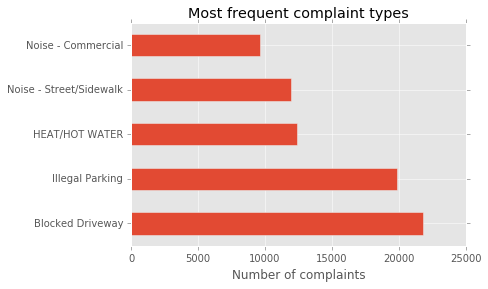

In [414]:
ax = df['Complaint Type'].value_counts().head(5).plot(kind='barh')
ax.set_title("Most frequent complaint types")
ax.set_xlabel("Number of complaints")

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [415]:
# Source for capita data: https://en.wikipedia.org/wiki/Borough_(New_York_City)

borough_capita = {'Manhattan': 1636268, 'Bronx': 1438159, 'Brooklyn': 2621793, 'Queens': 2321580, 'Staten Island': 473279 }
cpc = {}
for borough in borough_capita:
    temp_cpc = ''
    temp_complaints = df[df['Borough'] == borough.upper()]['Unique Key'].count()
    temp_cpc = temp_complaints / borough_capita[borough]
    cpc[borough] = temp_cpc
for borough in cpc:
    print(borough + ":", str(cpc[borough] * 1000), "complaints per 1000 people.")

Bronx: 20.5888222373 complaints per 1000 people.
Queens: 20.1690228207 complaints per 1000 people.
Brooklyn: 21.7900497865 complaints per 1000 people.
Staten Island: 15.6081296656 complaints per 1000 people.
Manhattan: 25.6987241699 complaints per 1000 people.


According to your selection of data, **how many cases were filed in March?** How about May?

In [416]:
march = df.groupby(by=df.index.month)['Unique Key'].count()[3]
may = df.groupby(by=df.index.month)['Unique Key'].count()[5]
print("In March were", march, "cases filed.")
print("For May we count", may, "cases.")

In March were 15025 cases filed.
For May we count 49715 cases.


I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [417]:
df['2015-04-01']
# Alternative: df.loc[(df.index.month==4) & (df.index.day==1)]

Unique Key             Closed Date Agency  \
created_datetime                                                 
2015-04-01 21:37:42    30311691  04/01/2015 10:49:33 PM   NYPD   
2015-04-01 23:12:04    30307701  04/01/2015 11:32:40 PM   NYPD   
2015-04-01 13:10:35    30313389  04/07/2015 04:01:08 PM    DPR   
2015-04-01 17:37:38    30314393  04/03/2015 11:40:54 AM    DPR   
2015-04-01 12:32:40    30309207  04/17/2015 01:06:49 AM    DCA   
2015-04-01 18:44:50    30311759  06/24/2015 11:27:00 AM    DPR   
2015-04-01 16:30:15    30309690  04/01/2015 11:27:22 PM   NYPD   
2015-04-01 09:04:07    30307990  04/06/2015 09:17:10 AM    DOF   
2015-04-01 07:46:58    30308253  04/01/2015 09:32:31 AM   NYPD   
2015-04-01 17:12:17    30314214  04/09/2015 02:20:11 PM    DOT   
2015-04-01 21:30:48    30307111                     NaN  DOHMH   
2015-04-01 15:51:04    30311571  04/14/2015 09:23:30 AM    DPR   
2015-04-01 10:43:28    30313817                     NaN    DPR   
2015-04-01 15:12:46    30308922  06/01/2015 06:25:48 AM  DOHMH   
2015-04-01 06:15:42    30311132  04/01/2015 10:28:30 AM    DOT   
2015-04-01 11:28:02    30308180  04/01/2015 11:42:53 AM    DOT   
2015-04-01 17:35:18    30313207  06/01/2015 06:25:54 AM  DOHMH   
2015-04-01 13:54:54    30310017  04/06/2015 10:11:11 AM    DOF   
2015-04-01 23:49:33    30306774  04/02/2015 12:20:59 AM   NYPD   
2015-04-01 07:50:49    30313339  07/08/2015 02:19:25 PM    DOT   
2015-04-01 13:50:29    30312146  06/01/2015 06:25:49 AM  DOHMH   
2015-04-01 16:14:19    30313259  04/01/2015 04:21:53 PM    HRA   
2015-04-01 19:27:34    30308920  04/01/2015 08:45:17 PM   NYPD   
2015-04-01 05:30:02    30314164  04/01/2015 02:57:31 PM    DOT   
2015-04-01 10:33:26    30311790  04/01/2015 11:19:12 AM   NYPD   
2015-04-01 11:47:38    30310940  04/06/2015 09:23:32 AM    DOF   
2015-04-01 11:01:27    30310409  04/17/2015 01:06:42 AM    DCA   
2015-04-01 08:51:52    30310350  04/03/2015 04:33:46 PM    DCA   
2015-04-01 14:58:55    30313106  04/06/2015 10:06:35 AM    DOF   
2015-04-01 16:59:19    30309324  04/01/2015 07:48:33 PM   NYPD   
...                         ...                     ...    ...   
2015-04-01 17:12:09    30313532  04/30/2015 06:02:47 PM    DOT   
2015-04-01 17:09:29    30311473  04/30/2015 05:59:38 PM    DOT   
2015-04-01 18:30:22    30307427  05/06/2015 10:59:47 AM    DOT   
2015-04-01 21:07:21    30314301  05/08/2015 11:30:22 AM    TLC   
2015-04-01 10:50:12    30312508  05/08/2015 10:21:38 AM    TLC   
2015-04-01 09:07:38    30310225  05/04/2015 10:43:15 AM    DPR   
2015-04-01 16:18:25    30313554  05/08/2015 11:29:12 AM    TLC   
2015-04-01 10:23:09    30313061  05/07/2015 02:19:57 PM    TLC   
2015-04-01 14:31:57    30312110  05/08/2015 06:05:44 PM    DPR   
2015-04-01 18:50:19    30307758  05/07/2015 07:46:48 AM    DPR   
2015-04-01 14:03:43    30313462  05/06/2015 12:48:52 PM    DOT   
2015-04-01 11:59:20    30310246  11/09/2015 03:58:34 PM    DOT   
2015-04-01 09:17:40    30310085  05/07/2015 06:53:11 PM    DOT   
2015-04-01 21:13:08    30314474  05/08/2015 11:27:01 AM    TLC   
2015-04-01 12:59:08    30308968  04/01/2015 12:59:23 PM    HRA   
2015-04-01 13:31:23    30308389  04/01/2015 01:32:08 PM    HRA   
2015-04-01 16:42:15    30309377  04/01/2015 04:43:11 PM    HRA   
2015-04-01 13:37:07    30310992  04/01/2015 01:37:28 PM    HRA   
2015-04-01 23:44:04    30310652  04/02/2015 01:25:52 AM   NYPD   
2015-04-01 16:32:12    30309028  05/20/2015 05:36:29 PM    TLC   
2015-04-01 08:26:06    30312622  06/01/2015 06:25:41 AM  DOHMH   
2015-04-01 15:08:20    30308371  06/01/2015 06:18:02 PM    TLC   
2015-04-01 10:19:21    30311001  06/01/2015 06:25:39 AM  DOHMH   
2015-04-01 20:20:13    30311341  04/01/2015 10:49:32 PM   NYPD   
2015-04-01 02:16:44    30308863  04/01/2015 02:54:17 AM   NYPD   
2015-04-01 13:12:58    30307673  04/01/2015 10:01:26 PM   NYPD   
2015-04-01 13:17:23    30307732  04/01/2015 01:31:22 PM   NYPD   
2015-04-01 21:39:04    30311958  04/01/2015 09:50:48 PM   NYP

What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [418]:
df['2015-04-01']['Complaint Type'].value_counts().head(1)
# Alternative, if more than one year:
# df.loc[(df.index.month==4) & (df.index.day==1)]['Complaint Type'].value_counts().head(1)

Illegal Parking    67
Name: Complaint Type, dtype: int64

In [419]:
df['2015-04-01']['Complaint Type'].value_counts().head(3)
# df.loc[(df.index.month==4) & (df.index.day==1)]['Complaint Type'].value_counts().head(3)

Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Complaint Type, dtype: int64

**What month has the most reports filed?** How many? Graph it.

In [420]:
df.resample('M')['Unique Key'].count().sort_values(ascending=False).head(1)

created_datetime
2015-05-31    49715
Name: Unique Key, dtype: int64

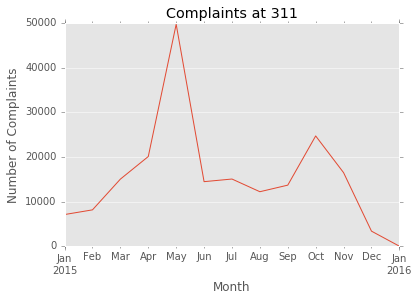

In [421]:
ax = df.resample('M')['Unique Key'].count().plot()
ax.set_ylabel("Number of Complaints")
ax.set_xlabel("Month")
ax.set_title("Complaints at 311")

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [422]:
df.resample('W')['Unique Key'].count().sort_values(ascending=False).head(1)

created_datetime
2015-05-10    13559
Name: Unique Key, dtype: int64

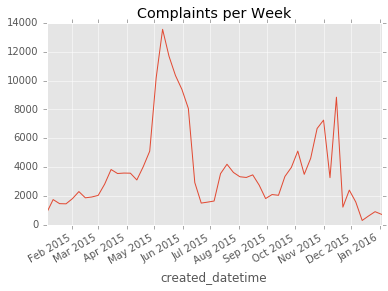

In [423]:
ax = df.resample('W')['Unique Key'].count().sort_values(ascending=False).plot()
ax.set_title("Complaints per Week")

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [424]:
df

Unique Key             Closed Date Agency  \
created_datetime                                                 
2015-07-06 10:58:27    31015465  07/22/2015 01:07:20 AM    DCA   
2015-07-03 13:26:29    30997660  07/03/2015 02:08:20 PM   NYPD   
2015-11-09 03:55:09    31950223  11/09/2015 08:08:57 AM   NYPD   
2015-07-03 02:18:32    31000038  07/03/2015 07:54:48 AM   NYPD   
2015-07-04 00:03:27    30995614  07/04/2015 03:33:09 AM   NYPD   
2015-07-09 00:00:00    31042454  07/20/2015 12:00:00 AM  DOHMH   
2015-07-09 12:04:06    31043076                     NaN    DPR   
2015-07-09 00:00:00    31037751                     NaN  DOHMH   
2015-08-12 11:09:49    31298553  08/28/2015 01:06:41 AM    DCA   
2015-09-09 21:59:03    31492526  09/09/2015 11:17:39 PM   NYPD   
2015-09-09 12:12:46    31495596  12/15/2015 02:07:21 PM    DPR   
2015-09-22 13:50:05    31593923                     NaN    DPR   
2015-09-22 13:12:13    31593417  09/25/2015 11:20:14 AM    DOB   
2015-09-22 15:07:51    31593599                     NaN    DPR   
2015-04-28 18:26:58    30502370  04/28/2015 07:29:34 PM   NYPD   
2015-04-28 17:54:46    30498881  10/08/2015 04:30:57 PM    DOT   
2015-09-13 13:35:02    31524474  09/13/2015 10:02:02 PM   NYPD   
2015-09-13 21:04:42    31527345  09/14/2015 01:51:56 AM   NYPD   
2015-07-04 16:57:07    31006258  09/03/2015 06:26:41 AM  DOHMH   
2015-05-21 19:01:52    30668699  05/21/2015 09:56:29 PM   NYPD   
2015-07-13 01:14:41    31060994  07/13/2015 07:20:37 AM   NYPD   
2015-07-28 10:16:21    31181885  07/28/2015 11:52:28 AM   NYPD   
2015-05-21 20:40:35    30673749  05/21/2015 11:19:33 PM   NYPD   
2015-05-21 04:43:05    30671660  05/21/2015 06:18:38 AM   NYPD   
2015-05-21 18:31:40    30670824  05/21/2015 09:45:49 PM   NYPD   
2015-08-31 15:35:00    31435374  09/01/2015 12:00:00 PM   DSNY   
2015-09-22 20:51:13    31591848  02/16/2016 01:44:34 PM    DPR   
2015-09-22 10:29:56    31593561  10/13/2015 11:01:42 AM    DPR   
2015-09-03 14:13:35    31458870  09/19/2015 01:06:53 AM    DCA   
2015-09-22 13:06:44    31591347  11/11/2015 01:34:37 PM    DPR   
...                         ...                     ...    ...   
2015-06-09 07:53:15    30804422  06/26/2015 08:00:47 AM    DOT   
2015-10-18 10:19:26    31780102  10/21/2015 09:26:54 AM    HPD   
2015-06-09 10:53:13    30804353  07/07/2015 01:00:44 PM    DPR   
2015-04-29 09:18:00    30509207  04/27/2015 09:18:00 AM    DOT   
2015-06-09 00:00:00    30803892                     NaN    HPD   
2015-01-09 21:51:45    29682375  01/14/2015 09:37:31 AM    DOT   
2015-06-09 17:17:35    30803802  06/30/2015 09:14:42 AM    DPR   
2015-06-08 15:30:05    30802790  06/09/2015 03:33:25 PM    HPD   
2015-06-08 21:00:10    30802223  06/08/2015 11:00:33 PM   NYPD   
2015-06-09 11:06:41    30803899  06/18/2015 08:16:38 AM    DOF   
2015-04-30 18:31:10    30518393  05/28/2015 07:54:55 PM    DOT   
2015-06-08 22:42:14    30802631  06/09/2015 02:50:42 AM   NYPD   
2015-08-17 12:43:10    31329678  08/31/2015 11:05:55 AM    HPD   
2015-04-30 05:56:19    30515724  04/30/2015 02:34:42 PM    DOT   
2015-06-08 15:30:46    30802923  06/09/2015 06:16:42 AM   NYPD   
2015-03-09 09:56:11    30130812  03/09/2015 09:56:37 AM    HRA   
2015-08-17 09:20:48    31329672  08/31/2015 12:34:12 PM    HPD   
2015-08-17 09:57:54    31329661  08/31/2015 11:05:14 AM    HPD   
2015-04-30 10:04:39    30514412  04/30/2015 05:27:31 PM   NYPD   
2015-06-09 07:40:17    30804658  06/09/2015 02:52:00 PM   NYPD   
2015-10-22 21:32:33    31852899  12/17/2015 11:51:46 AM    TLC   
2015-10-22 16:42:08    31841768  10/23/2015 07:35:22 AM   NYPD   
2015-04-30 21:20:00    30520027  04/30/2015 10:13:14 PM   NYPD   
2015-06-10 12:08:46    30812148  06/18/2015 04:50:34 PM    DOF   
2015-04-16 21:27:44    30413818  04/16/2015 10:14:59 PM   NYPD   
2015-06-09 11:11:56    30804200  06/09/2015 11:38:39 AM   NYPD   
2015-06-09 00:00:00    30804335  06/10/2015 12:00:00 AM    HPD   
2015-04-29 14:29:00    30509208  04/23/2015 10:55:00 PM    DO

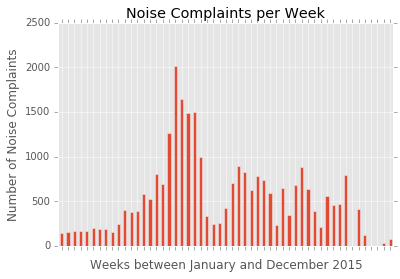

In [425]:
df['noise'] = df['Complaint Type'].str.contains('Noise' or 'noise')
df_noise = df[df['noise'] == True]
ax = df_noise.resample('W')['Unique Key'].count().plot(kind='bar')
ax.set_title("Noise Complaints per Week")
ax.set_xticklabels('')
ax.set_xlabel("Weeks between January and December 2015")
ax.set_ylabel("Number of Noise Complaints")

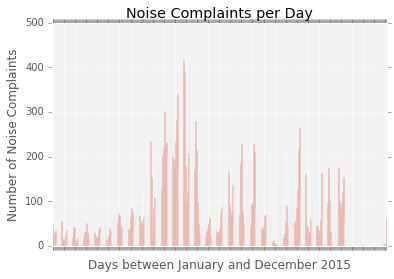

In [426]:
ax = df_noise.resample('D')['Unique Key'].count().plot(kind='bar')
ax.set_title('Noise Complaints per Day')
ax.set_xticklabels('')
ax.set_xlabel("Days between January and December 2015")
ax.set_ylabel("Number of Noise Complaints")

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [427]:
df.resample('D')['Unique Key'].count().sort_values(ascending=False).head(5)

created_datetime
2015-10-28    2697
2015-11-09    2529
2015-05-04    2465
2015-05-11    2293
2015-10-29    2258
Name: Unique Key, dtype: int64

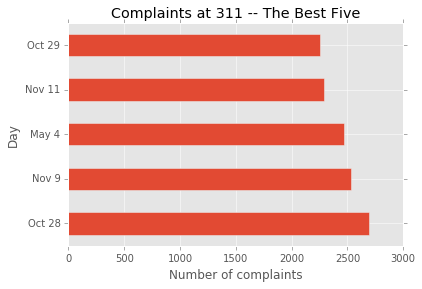

In [428]:
ax = df.resample('d')['Unique Key'].count().sort_values(ascending=False).head(5).plot(kind='barh')
ax.set_xlabel("Number of complaints")
ax.set_ylabel("Day")
ax.set_title("Complaints at 311 -- The Best Five")
ax.set_yticklabels(['Oct 28', 'Nov 9', 'May 4', 'Nov 11', 'Oct 29'])

**What hour of the day are the most complaints?** Graph a day of complaints.

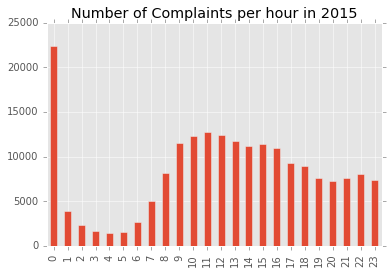

In [429]:
ax = df.groupby(by=df.index.hour)['Unique Key'].count().plot(kind='bar')
ax.set_title('Number of Complaints per hour in 2015')

Axes(0.125,0.125;0.775x0.775)


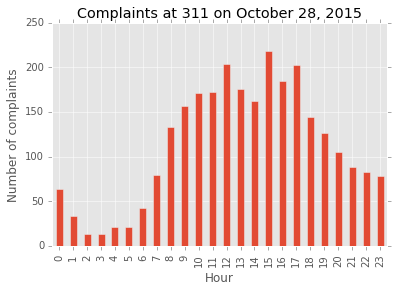

In [430]:
ax = df['2015-10-28'].resample('H').count()['Unique Key'].plot(kind='bar')
ax.set_ylabel("Number of complaints")
ax.set_xlabel("Hour")
ax.set_title("Complaints at 311 on October 28, 2015")
ax.set_xticklabels(range(0,24))
print(ax)

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [431]:
print("There are a couple of odd numbers of complaints in this data.")

df_temp = df.groupby(by=df.index.hour)['Unique Key'].count()
df_numbers = pd.DataFrame(df_temp)
df_numbers['even'] = df_numbers % 2 == 0

print(df_numbers[df_numbers['even'] == False])

There are a couple of odd numbers of complaints in this data.
    Unique Key   even
0        22427  False
1         3927  False
6         2687  False
8         8157  False
10       12343  False
11       12729  False
12       12469  False
13       11745  False
14       11205  False
17        9291  False
18        8965  False
22        8085  False


In [432]:
print('I picked the hour between 10 and 11 AM.')
print(df.loc[(df.index.hour==10)]['Complaint Type'].value_counts().head(5))

print('\nThe most common complaints the hour before:')
print(df.loc[(df.index.hour==10-1)]['Complaint Type'].value_counts().head(5))

print('\nThe most common complaints the hour after:')
print(df.loc[(df.index.hour==10+1)]['Complaint Type'].value_counts().head(5))

I picked the hour between 10 and 11 AM.
Blocked Driveway    1280
Illegal Parking     1175
Street Condition     695
Graffiti             585
HEAT/HOT WATER       518
Name: Complaint Type, dtype: int64

The most common complaints the hour before:
Blocked Driveway     1367
Illegal Parking      1306
Street Condition      736
HEAT/HOT WATER        544
Broken Muni Meter     503
Name: Complaint Type, dtype: int64

The most common complaints the hour after:
Illegal Parking      1184
Blocked Driveway     1170
Street Condition      694
Broken Muni Meter     596
Graffiti              566
Name: Complaint Type, dtype: int64


In [433]:
print("I also took a look at the most common complaints on October 28 between 2 and 3 PM:\n")
print(df['2015-10-28 14:00:00':'2015-10-28 14:59:59']['Complaint Type'].value_counts().head(5))

print("\nThe hour before:\n")
print(df['2015-10-28 13:00:00':'2015-10-28 13:59:59']['Complaint Type'].value_counts().head(5))

print("\nThe hour after:\n")
print(df['2015-10-28 15:00:00':'2015-10-28 15:59:59']['Complaint Type'].value_counts().head(5))

I also took a look at the most common complaints on October 28 between 2 and 3 PM:

HEAT/HOT WATER            19
PAINT/PLASTER             17
Blocked Driveway          13
UNSANITARY CONDITION      11
DOF Literature Request     7
Name: Complaint Type, dtype: int64

The hour before:

HEAT/HOT WATER          24
PAINT/PLASTER           17
UNSANITARY CONDITION    13
Illegal Parking         12
Blocked Driveway        10
Name: Complaint Type, dtype: int64

The hour after:

HEAT/HOT WATER            31
UNSANITARY CONDITION      18
Illegal Parking           16
DOF Literature Request    15
Blocked Driveway          15
Name: Complaint Type, dtype: int64


So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

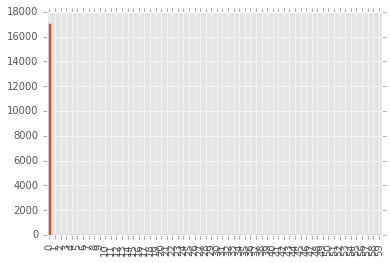

In [452]:
df_earlybird = df.loc[df.index.hour==0]
df_earlybird = df_earlybird.groupby(by=df_earlybird.index.minute)
df_earlybird['Unique Key'].count().plot(kind='bar')

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

These are the agencies with the most inquries: New York City Police Department, Department of Housing Preservation and Development, Department of Transportation, Department of Parks and Recreation, Department of Health and Mental Hygiene.


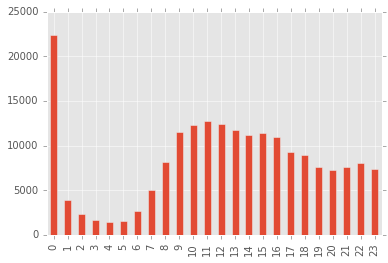

In [435]:
# Todo

common_agencies = list()
common_agencies = df['Agency Name'].value_counts().head(5).keys().tolist()
print('These are the agencies with the most inquries:', ", ".join(common_agencies) +".")

#df_nypd = df[df['Agency Name'] == 'New York City Police Department']
df.groupby([df.index.hour])['Unique Key'].count().plot(kind='bar')

#df.loc[(df.index.hour==10)]['Complaint Type'].value_counts().head(5))
#df[df['Agency Name'] == 'New York City Police Department'].resample('W')['Agency'].count().plot

#df[df['Agency'] == 'NYPD'].loc[df.index.hour]
#for agency in common_agencies:
#    df[df['Agency Name'] == agency].groupby(by=[df.index.hour])
    #.groupby([by=df.index.hour])['Unique Key'].count().plot(kind='bar') #.resample('H'))#.count().plot())
    #df.loc[(df.index.hour==range(0,24))]['Agency Name'].count()

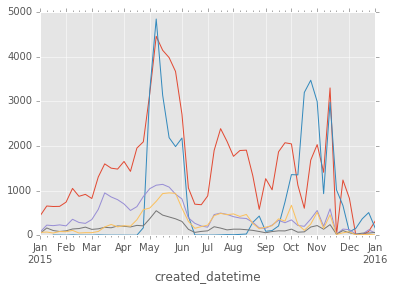

In [444]:
#Todo
ax = df[df['Agency Name'] == 'New York City Police Department'].resample('W')['Unique Key'].count().plot()
df[df['Agency Name'] == 'Department of Housing Preservation and Development'].resample('W')['Unique Key'].count().plot()
df[df['Agency Name'] == 'Department of Transportation'].resample('W')['Unique Key'].count().plot()
df[df['Agency Name'] == 'Department of Health and Mental Hygiene'].resample('W')['Unique Key'].count().plot()
df[df['Agency Name'] == 'Department of Parks and Recreation'].resample('W')['Unique Key'].count().plot()

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

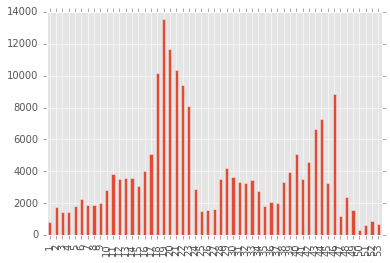

In [437]:
df.groupby([df.index.week])['Unique Key'].count().plot(kind='bar')

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [438]:
df_nypd = df[df['Agency'] == 'NYPD']

print("August:")
print(df_nypd['2015-08']['Complaint Type'].value_counts().head(3))

print("\nMay:")
print(df_nypd['2015-05']['Complaint Type'].value_counts().head(3))

August:
Noise - Street/Sidewalk    1467
Illegal Parking            1456
Blocked Driveway           1369
Name: Complaint Type, dtype: int64

May:
Blocked Driveway           4114
Illegal Parking            3975
Noise - Street/Sidewalk    3385
Name: Complaint Type, dtype: int64


In [439]:
df_hpd = df[df['Agency'] == 'HPD']

# Seasons according to http://www.timeanddate.com/calendar/aboutseasons.html (Northern Meteorological Seasons)

frames_winter = [df_hpd['2015-1'], df_hpd['2015-2'], df_hpd['2015-12']]
df_hpd_winter = pd.concat(frames_winter)
print("The most common complaints at Housing Preservation Bureau in Winter:")
print(df_hpd_winter['Complaint Type'].value_counts().head(5))

print("\n")

frames_summer = [df_hpd['2015-6'], df_hpd['2015-7'], df_hpd['2015-8']]
df_hpd_summer = pd.concat(frames_summer)
print("The most common complaints at Housing Preservation Bureau in Summer:")
print(df_hpd_summer['Complaint Type'].value_counts().head(5))

The most common complaints at Housing Preservation Bureau in Winter:
HEAT/HOT WATER          353
UNSANITARY CONDITION    190
PLUMBING                139
PAINT/PLASTER           139
DOOR/WINDOW             103
Name: Complaint Type, dtype: int64


The most common complaints at Housing Preservation Bureau in Summer:
HEAT/HOT WATER            617
UNSANITARY CONDITION      510
HPD Literature Request    462
PAINT/PLASTER             444
PLUMBING                  309
Name: Complaint Type, dtype: int64
